In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd

C:\Users\danie\AppData\Local\Temp\ipykernel_24612\301082987.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
# Load dataset
iris = pd.read_csv("../datasets/Iris/Iris.csv")
# delete the id
iris = iris.drop("Id",axis=1).values

# Split the features and labels
X = iris[:,0:2] # Data
Y = iris[:,4] # Ground truth

In [9]:
val_size = 0.2
seed = 8 # Choose a random number in our data base

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=val_size,
    random_state=seed)

In [10]:
# Import the algorithm
k = 12 # Define the number of k neighbors
knn = KNeighborsClassifier(n_neighbors=k,weights='distance')

# Train classifier
knn.fit(X_train, Y_train)

# Test the answer of our train model
Y_train_pred = knn.predict(X_train)
train_acc = accuracy_score(Y_train_pred, Y_train)
print('train accuracy: {}'.format(train_acc))

train accuracy: 0.9666666666666667


In [11]:
# test the answer with the test set
Y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(Y_test_pred, Y_test)
print('test accuracy: {}'.format(test_acc))

test accuracy: 0.6333333333333333


In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

'''def plot_des_bound(clf, axes):
    xp = np.linspace(axes[0], axes[1], 200)
    yp = np.linspace(axes[2], axes[3], 200)

    x1, y1 = np.meshgrid(xp, yp)
    xy = np.c_[x1.ravel(), y1.ravel()]

    y_pred = clf.predict(xy).reshape(x1.shape)
    custom_map = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, y1, y_pred, alpha=0.3, cmap=custom_map)

plot_des_bound(knn, axes=[4,8,1.5,5])
p1 = plt.scatter(X[y==0,0], X[y==0,1], color='blue')
p2 = plt.scatter(X[y==1,0], X[y==1,1], color='green')
p3 = plt.scatter(X[y==2,0], X[y==2,1], color='red')

plt.legend([p1,p2,p3], iris['Species'], loc='upper right')
plt.show()'''

"def plot_des_bound(clf, axes):\n    xp = np.linspace(axes[0], axes[1], 200)\n    yp = np.linspace(axes[2], axes[3], 200)\n\n    x1, y1 = np.meshgrid(xp, yp)\n    xy = np.c_[x1.ravel(), y1.ravel()]\n\n    y_pred = clf.predict(xy).reshape(x1.shape)\n    custom_map = ListedColormap(['#fafab0','#9898ff','#a0faa0'])\n    plt.contourf(x1, y1, y_pred, alpha=0.3, cmap=custom_map)\n\nplot_des_bound(knn, axes=[4,8,1.5,5])\np1 = plt.scatter(X[y==0,0], X[y==0,1], color='blue')\np2 = plt.scatter(X[y==1,0], X[y==1,1], color='green')\np3 = plt.scatter(X[y==2,0], X[y==2,1], color='red')\n\nplt.legend([p1,p2,p3], iris['Species'], loc='upper right')\nplt.show()"

TypeError: Image data of dtype object cannot be converted to float

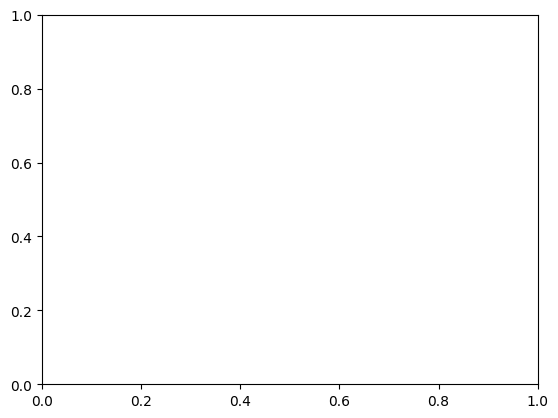

In [18]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.02

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (k, weights))

plt.show()

Automatically created module for IPython interactive environment


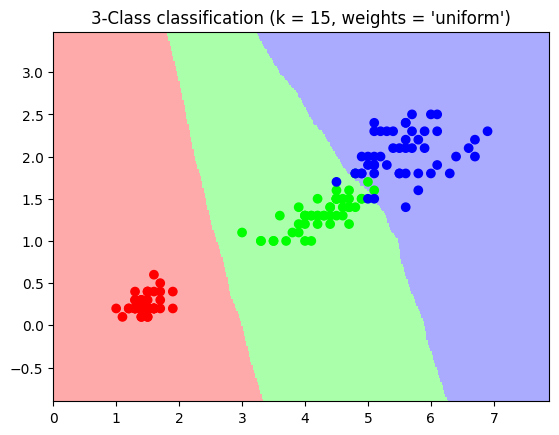

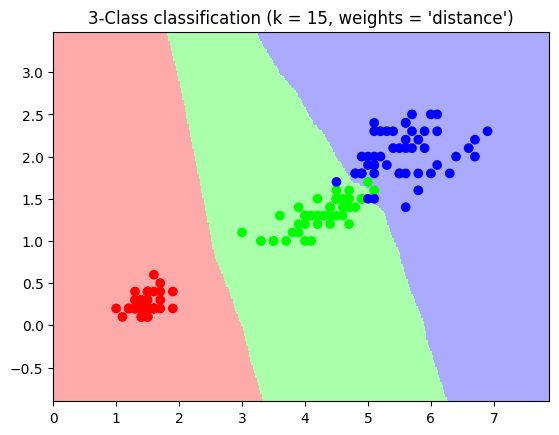

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()